# Handwritten Digit Recognition with Convolutional neural network

* Building a convolutional neural network for Handwritten written digit recognition.
* Handwritten digits from MNIST dataset: 60,000 training set and 10,000 test sets
* Each example is a 28x28 grayscale image, associated with a label from 10 classes
* Effect of batch size on training time and accuracy evaluated.
* Visualization of feature maps on convolution and pooling layers.

Train a CNN
1. 16 x 3 x 3 convolution layer
2. 2 x 2 max pooling layer
1. 32 x 3 x 3 convolution layer
2. 2 x 2 max pooling layer
3. 128-neurons hidden layer (ReLU)
4. output layer (softmax)

Optimizer: Adaptive Moment Estimation (Adam)

Loss function: sparse categorical cross-entropy

## Obtaining the train and test sets

In [1]:
import tensorflow as tf

#obtain MNIST train and test sets
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalization of data
training_images = training_images.reshape(60000, 28, 28, 1) / 255.0
test_images = test_images.reshape(10000, 28, 28, 1) / 255.0


## Training a convolutional neural network

* Set callbacks

In [2]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.998):
      print("\nReached 99.8% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()

* Bulding the CNN model: 1 convolution+maxpooling + 1 hidden layer + 1 output layer

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               102528    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

* Optimizer and loss function

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

* Training

In [6]:
model.fit(training_images, training_labels, batch_size = 30, epochs=20,callbacks=[callbacks])

Epoch 1/20
60000/60000 [==============================] - 20s 329us/sample - loss: 0.1490 - acc: 0.9545

## Evaluation

* Evaluation with test set

In [7]:
test_loss = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 88us/sample - loss: 0.0398 - acc: 0.9901

* Example with the first test data

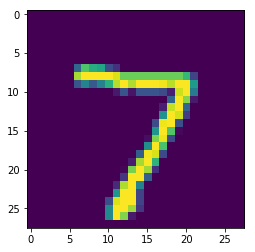

In [8]:
# True label
import matplotlib.pyplot as plt
plt.imshow(test_images[0].reshape(28,28))
plt.show()

In [9]:
# Prediction
import numpy as np
classifications = model.predict(test_images)
index, = np.where(classifications[0] == max(classifications[0]))
print(index)

[7]


## Test the effect of batch size on training time and accuracy

Here, I test the effec of batch size on training the CNN. All the test was done on Macbook Pro (Retina, 13-inch, Early 2015).

* As it can be seen, as batch size increases, it takes more epochs (iterations) for convergence. 
* At the same time, the optimization time of one epoch (here I took the time of the final epoch) becomes shorter.
* Optimization with larger batch size operates less calculations of gradients per epoch, whereas there are more gradient calculations for the case with smaller batch size. With smaller batch size, the gradient is updated more flequently, and the loss value fluctuates more heavily. It may help objective function to jump to a better local minimum, but it may also complicate the convergence to the exact local/global minimum.


* The total time for the convergence (assuming each epoch takes the same optimization time as that of the final epoch) decreases with increasing batch size. This conclusion might not be true if I further increases the batch size. Also, I only did a single optimization for each batch size. Multiple trainings and the comparison of the corresponding average values is needed.


* The accuracy of the model does not change significantly with increasing batch size.


* Conclusions: Any batch sizes > 30 has comparable performance in terms of total training time vs accuracy on test data set, which corresponds to < 200 batches for each epoch.


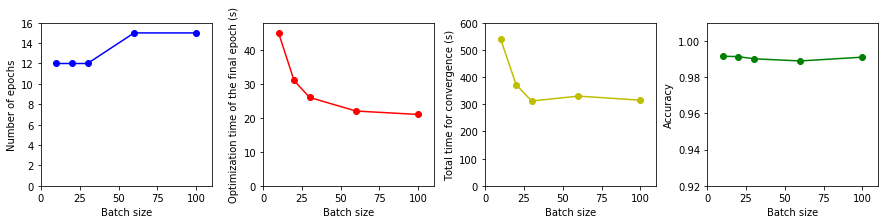

In [10]:
# Tested batch size
batch_size = np.array([10, 20, 30, 60, 100])
# Number of epochs for convergence
epochs = np.array([12, 12, 12, 15, 15])
# Time of the optimization of the final epoch
epoch_time = np.array([45, 31, 26, 22, 21])
# Total time for convergence (assuming each epoch takes the same optimization time as that of the final epoch)
total_time = epochs*epoch_time
# Accuracy on test set
acc = [0.9915, 0.9913, 0.9901, 0.9889, 0.9910]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,4,figsize = (15,3))
ax[0].plot(batch_size, epochs,'-bo')
ax[0].set_xlabel('Batch size')
ax[0].set_ylabel('Number of epochs')
ax[0].set(xlim=[0.0, 110], ylim=[0.0,16])

ax[1].plot(batch_size, epoch_time,'-ro')
ax[1].set_xlabel('Batch size')
ax[1].set_ylabel('Optimization time of the final epoch (s)')
ax[1].set(xlim=[0.0, 110], ylim=[0.0,48])

ax[2].plot(batch_size, total_time,'-yo')
ax[2].set_xlabel('Batch size')
ax[2].set_ylabel('Total time for convergence (s)')
ax[2].set(xlim=[0.0, 110], ylim=[0.0,600])

ax[3].plot(batch_size, acc,'-go')
ax[3].set_xlabel('Batch size')
ax[3].set_ylabel('Accuracy')
ax[3].set(xlim=[0.0, 110], ylim=[0.92,1.01])

plt.subplots_adjust(wspace = 0.3)
plt.show()

## Visualize the convolutions and pooling

In [11]:
print(test_labels[:30])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


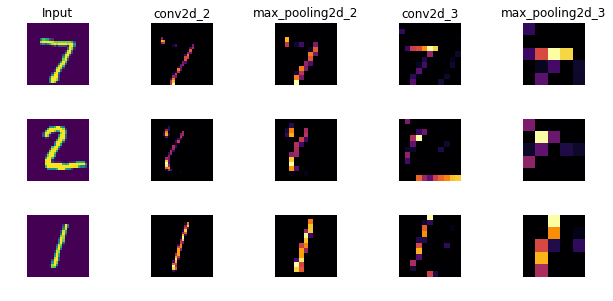

In [12]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,5,figsize=(10,5))
FIRST_IMAGE=0
SECOND_IMAGE=1
THIRD_IMAGE=2
CONVOLUTION_NUMBER = 4
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
layer_names = [layer.name for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

# Input pictures
axarr[0,0].imshow(test_images[FIRST_IMAGE].reshape(28,28))
axarr[0,0].set_title("Input")
axarr[0,0].grid(False)
axarr[0,0].axis('off')
axarr[1,0].imshow(test_images[SECOND_IMAGE].reshape(28,28))
axarr[1,0].grid(False)
axarr[1,0].axis('off')
axarr[2,0].imshow(test_images[THIRD_IMAGE].reshape(28,28))
axarr[2,0].grid(False)
axarr[2,0].axis('off')


# pictures in convolution and maxpooling layers
for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x+1].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x+1].set_title(layer_names[x])
    axarr[0,x+1].grid(False)
    axarr[0,x+1].axis('off')
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x+1].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x+1].grid(False)
    axarr[1,x+1].axis('off')
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x+1].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x+1].grid(False)
    axarr[2,x+1].axis('off')
plt.subplots_adjust(wspace = 1.0)
plt.show()